# Imports

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Lab 1: Image Classifier with Keras Sequential API

In [4]:
def show_mnist_fashion():
    n_rows = 4
    n_cols = 10
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
            plt.axis('off')
            plt.title(class_names[y_train[index]], fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

In [5]:
fashon_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashon_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
X_valid, X_train = X_train_full[:5000] / 255. , X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

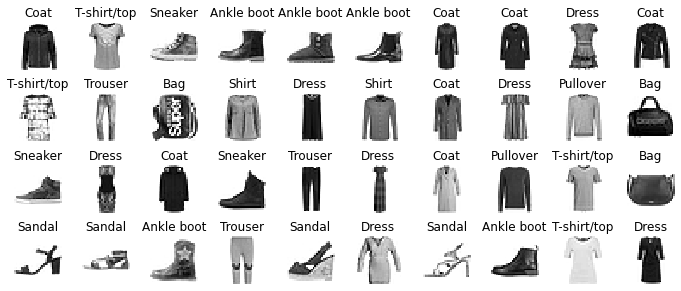

In [8]:
show_mnist_fashion()

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [12]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7187 - accuracy: 0.7639 - val_loss: 0.5136 - val_accuracy: 0.8292
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4890 - accuracy: 0.8315 - val_loss: 0.4422 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4436 - accuracy: 0.8457 - val_loss: 0.4164 - val_accuracy: 0.8580
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4149 - accuracy: 0.8546 - val_loss: 0.4065 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3944 - accuracy: 0.8600 - val_loss: 0.3805 - val_accuracy: 0.8680
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3772 - accuracy: 0.8680 - val_loss: 0.3793 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3633 - accuracy: 0.8718 - val_loss: 0.3622 - val_accuracy

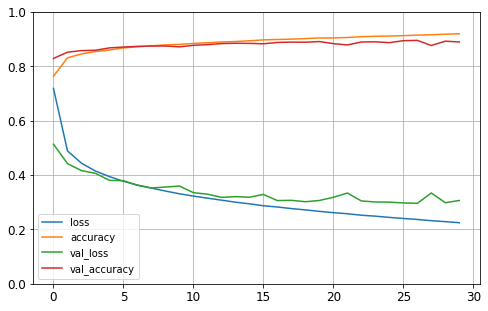

In [13]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3452 - accuracy: 0.8778


[0.3452146351337433, 0.8777999877929688]

In [15]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [16]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [17]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [18]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

# Lab 2 : Regression MLP with Keras Sequential API

## Data preparation

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
print('feature_names:', housing['feature_names'])

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [20]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])
model.compile(loss="mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 1.9510 - val_loss: 0.8681
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7258 - val_loss: 0.6520
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6348 - val_loss: 0.5884
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5871 - val_loss: 0.5474
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5524 - val_loss: 0.5248
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5262 - val_loss: 0.4924
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5070 - val_loss: 0.4738
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4917 - val_loss: 0.4731
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4799 - val_loss: 0.4523
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4700 - val_loss: 0.4437

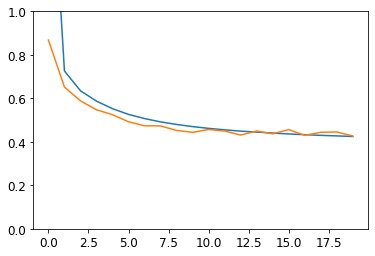

In [21]:
from pandas.core.frame import DataFrame
import pandas as pandas
plt.plot(pd.DataFrame(history.history))
plt.gca().set_ylim(0,1)
plt.show()

In [22]:
mse_test = model.evaluate(X_test, y_test)
print("mse_test", mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4143
mse_test 0.4143151044845581


In [23]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

array([[0.8296528],
       [1.7679845],
       [3.501278 ]], dtype=float32)

# Lab 3 : FUNCTIONAL API [KERAS FUNCTIONAL API FOR COMPLEX MODEL]


In [24]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

In [25]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


363/363 [==============================] - 1s 3ms/step - loss: 2.0232 - val_loss: 0.7524
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6773 - val_loss: 0.8267
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6113 - val_loss: 0.5668
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5673 - val_loss: 0.6621
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5328 - val_loss: 0.4909
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5071 - val_loss: 0.5261
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4862 - val_loss: 0.4872
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4701 - val_loss: 0.4484
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4569 - val_loss: 0.4297
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4465 - val_loss: 0.4452
Epoch 11/2

In [26]:
mse_test = model.evaluate(X_test, y_test)
print("mse_test", mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3878
mse_test 0.38775837421417236


In [27]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)

[[0.639837 ]
 [1.6579531]
 [3.4535313]]


# 연습문제.

## 데이터 로드

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
print('feature_names:', housing['feature_names'])

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

feature_names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


## Question 1
sequential API를 사용하여 그림과 같이 housing 데이터셋을 이용하여 주택가격을 예측하는 회귀모델을 만드시오. 테스트셋에서의 mse 손실 값을 보이시오.

[Use sequential API, build a regression model as in the figure to predict house value in housing dataset. Report the mse loss on test set.]

* Epoch은 20으로 설정한다. >> epochs = 20
* 넘파이 랜덤 시드를 42로 설정한다. >> np.random.seed(42)
* 랜셔플로우 랜덤 시드를 42로 설정한다. >>tf.random.set_seed(42)
* Hidden layer 1: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 2: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 3: Dense layer, 30 neurons, “relu” activation function.

![Q1](https://blog.kakaocdn.net/dn/daQ5Cx/btq8TRATIIO/BjrIIERuz3w6a9zx0gKM2k/img.png)

Test MSE 정답(Ans)은 0.38입니다.

In [29]:
np.random.seed(42)
tf.random.set_seed(42)

### 1.1 시퀀시 API로 빌드.

In [30]:
model = keras.models.Sequential([keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)
                                 ])


### 1.2. 모델 훈련
### 1.2.1 모델 loss와 optimizer 설정

In [31]:
model.compile(loss="mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate=1e-3))

### 1.2.2 모델 훈련시키시오.

In [32]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2779 - val_loss: 1.6831
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.8083 - val_loss: 0.7846
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6376 - val_loss: 0.5802
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5831 - val_loss: 0.5377
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5474 - val_loss: 0.5037
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5176 - val_loss: 0.4804
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4940 - val_loss: 0.4659
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4746 - val_loss: 0.4444
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4585 - val_loss: 0.4269
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4455 - val_loss: 0.4122

### 1.3. 성능 평가하시오
* MSE 사용해 0.38 결과치를 보이시오

In [33]:
mse_test = model.evaluate(X_test, y_test)
print("mse_test", mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3848
mse_test 0.3848307132720947


## Question 2
Functional API 를 사용하여 그림과 같이 housing 데이터셋을 이용하여 주택가격을 예측하는 회귀모델을 만드시오. 테스트셋에서의 mse 손실 값을 보이시오.

[Use functional API, build a regression model as in the figure to predict house value in housing dataset. Report the mse loss on test set]

* Epoch은 20으로 설정한다. >> epochs = 20
* 넘파이 랜덤 시드를 42로 설정한다. >> np.random.seed(42)
* 랜셔플로우 랜덤 시드를 42로 설정한다. >>tf.random.set_seed(42)
* Hidden layer 1: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 2: Dense layer, 30 neurons, “relu” activation function.
* Hidden layer 3: Dense layer, 30 neurons, “relu” activation function.

![Q1](https://blog.kakaocdn.net/dn/daQ5Cx/btq8TRATIIO/BjrIIERuz3w6a9zx0gKM2k/img.png)

Test MSE 정답(Ans)은 0.38입니다.

In [34]:
np.random.seed(42)
tf.random.set_seed(42)

### 2.1 함수형 API로 빌드

In [41]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(30, activation="relu")(hidden2)
# concat = keras.layers.concatenate([input_, hidden3])
# output = keras.layers.Dense(1)(concat)
output = keras.layers.Dense(1)(hidden3)
model = keras.models.Model(inputs=[input_], outputs=[output])

### 2.1.1 모델 형태 출력하시오.

In [42]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_18 (Dense)            (None, 30)                270       
                                                                 
 dense_19 (Dense)            (None, 30)                930       
                                                                 
 dense_20 (Dense)            (None, 30)                930       
                                                                 
 dense_21 (Dense)            (None, 1)                 31        
                                                                 
Total params: 2,161
Trainable params: 2,161
Non-trainable params: 0
_________________________________________________________________


### 2.2. 모델 훈련
### 2.2.1 모델 loss와 optimizer 설정

In [43]:
model.compile(loss="mean_squared_error", optimizer = keras.optimizers.SGD(learning_rate=1e-3))

### 2.2.2 모델 훈련

In [44]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.9478 - val_loss: 0.8677
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.7501 - val_loss: 0.8461
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.6425 - val_loss: 0.7203
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5838 - val_loss: 0.5685
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5433 - val_loss: 0.5112
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5094 - val_loss: 0.4749
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4849 - val_loss: 0.4504
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4646 - val_loss: 0.4258
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4479 - val_loss: 0.4123
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4343 - val_loss: 0.4020

### 2.3. 성능 평가하시오.
* MSE 사용해 0.38 결과치를 보이시오.

In [45]:
mse_test = model.evaluate(X_test, y_test)
print("mse_test", mse_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3771
mse_test 0.3771301507949829
